<a href="https://colab.research.google.com/github/isabelaacr/Ciencia_de_dados_2/blob/main/Aula9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('inadimplentes.csv')

In [ ]:
data.head()

,score_credito,idade,inadimplente
0,402,48,0
1,735,23,0
2,570,44,0
3,406,57,0
4,371,51,0


In [ ]:
print ("Distribuição original: ", data['inadimplente'].value_counts(normalize=True))

Distribuição original:  inadimplente
0    0.857
1    0.143
Name: proportion, dtype: float64


In [ ]:
X = data.drop('inadimplente', axis=1)
y = data['inadimplente']

In [ ]:
from sklearn.metrics import (recall_score, precision_score, f1_score,
                            accuracy_score, confusion_matrix,
                            roc_auc_score, RocCurveDisplay)
import matplotlib.pyplot as plt
from IPython.display import display

def avalia_modelo(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Recall': recall_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Acurácia': accuracy_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

    print("\nMatriz de Confusão:")
    display(pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['Previsto Não', 'Previsto Sim'],
             index=['Real Não', 'Real Sim']))

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title('Curva ROC')
    plt.show()

    return pd.DataFrame([metrics])


Matriz de Confusão:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Previsto Não,Previsto Sim
Real Não,257,0
Real Sim,43,0


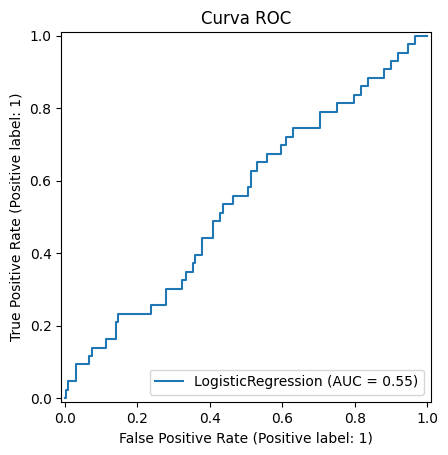

,Recall,Precisão,F1-Score,Acurácia,AUC-ROC
0,0.0,0.0,0.0,0.856667,0.546647


In [ ]:
# Holdout simples
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

modelo = LogisticRegression()
holdout_metricas = avalia_modelo(X_train, X_test, y_train, y_test, modelo)

holdout_metricas

In [ ]:
from sklearn.model_selection import KFold, cross_validate

# Validação cruzada tradicional

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = cross_validate(modelo, X, y, cv=kf, scoring=['recall', 'precision', 'f1', 'accuracy', 'roc_auc'], return_train_score=False)

print ("----Métricas k-fold tradicional----")
kfold_metricas = pd.DataFrame(
    { 'Recall': cv_metrics['test_recall'],
      'Precisão': cv_metrics['test_precision'],
      'F1-Score': cv_metrics['test_f1'],
      'Acurácia': cv_metrics['test_accuracy'],
      'AUC-ROC': cv_metrics['test_roc_auc']
      }
)
kfold_metricas

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


----Métricas k-fold tradicional----


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Recall,Precisão,F1-Score,Acurácia,AUC-ROC
0,0.0,0.0,0.0,0.820,0.381436
1,0.0,0.0,0.0,0.880,0.621922
2,0.0,0.0,0.0,0.840,0.506789
3,0.0,0.0,0.0,0.880,0.494318
4,0.0,0.0,0.0,0.865,0.413402


In [ ]:
display(kfold_metricas.describe().loc[['mean', 'std']])

,Recall,Precisão,F1-Score,Acurácia,AUC-ROC
mean,0.0,0.0,0.0,0.857000,0.483574
std,0.0,0.0,0.0,0.026363,0.093743


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Validação cruzada estratificada

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_metrics_skf = cross_validate(modelo, X, y, cv=skf, scoring=['recall', 'precision', 'f1', 'accuracy', 'roc_auc'], return_train_score=False)


print ("----Métricas k-fold estradicional----")
skf_metricas = pd.DataFrame(
    { 'Recall': cv_metrics_skf['test_recall'],
      'Precisão': cv_metrics_skf['test_precision'],
      'F1-Score': cv_metrics_skf['test_f1'],
      'Acurácia': cv_metrics_skf['test_accuracy'],
      'AUC-ROC': cv_metrics_skf['test_roc_auc']
      }
)
skf_metricas

----Métricas k-fold estradicional----


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

,Recall,Precisão,F1-Score,Acurácia,AUC-ROC
0,0.0,0.0,0.0,0.860,0.580357
1,0.0,0.0,0.0,0.860,0.442276
2,0.0,0.0,0.0,0.855,0.558782
3,0.0,0.0,0.0,0.855,0.509377
4,0.0,0.0,0.0,0.855,0.564227


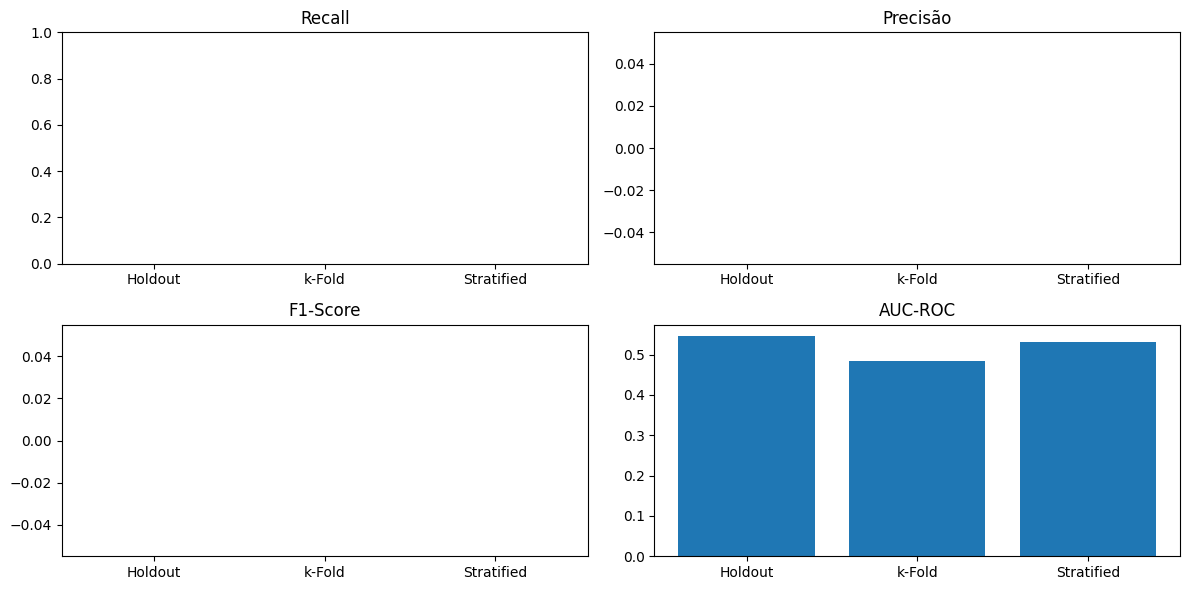

In [ ]:
plt.figure(figsize=(12, 6))
metrics_list = ['Recall', 'Precisão', 'F1-Score', 'AUC-ROC']

for i, metric in enumerate(metrics_list, 1):
    plt.subplot(2, 2, i)
    plt.bar(['Holdout', 'k-Fold', 'Stratified'],
            [holdout_metricas[metric].values[0],
             kfold_metricas[metric].mean(),
             skf_metricas[metric].mean()])
    plt.title(metric)
    if metric == 'Recall':
        plt.ylim(0, 1)

plt.tight_layout()
plt.show()

**Exercício 1:** Até aqui, ficou claro que a melhor abordagem para este dataset é a validação cruzada estratificada, mesmo ela não possuindo a melhor curva ROC como podemos ver no gráfico 4. Isso acontece porque o modelo é mais robusto já que foi exposto a dados equilibrados e diferentes em cada fase de treino e teste. Partido desse cenário, tente realizar algum pré-processamento nos dados e verifique se as métricas melhoram ou pioram.

**Exercício 2:** Pegue o dataset ``Titanic`` que usamos na aula 3 e faça a previsão de quem sobreviveu e quem faleceu. Decida qual a melhor estratégia de validação e descreva suas conclusões parciais a cada célula do seu Google Colab. Faça as devidas transformações nos dados.